# Lucata Simulation and Plotting Tools

### Lesson Objectives

Upon completing this notebook you should be able to understand and apply the following concepts:

1) Simulate microbench functions with different options  
2) Analyze the results of simulation through plots

### Environment Setup

In [1]:
#As with the previous notebook we set up the environment for tools to be used in this notebook. From the command line you can source the ../.env script.
import os

#Set the path to the latest toolset 
LUCATA_BASE="/tools/emu/pathfinder-sw/older/23.03" 

os.environ["USER_NOTEBOOK_CODE"]=os.path.dirname(os.getcwd())
os.environ["PATH"]=os.pathsep.join([os.path.join(LUCATA_BASE,"bin"),os.environ["PATH"]])
os.environ["FLAGS"]="-I"+LUCATA_BASE+"/include/"+" -L"+LUCATA_BASE+"/lib -lmemoryweb"

### Running Simulations for Profiling  

First we build all versions of `hello-world-*.c`. Then we will demonstrate how to run simulations and run each step of the profiling meta-script, `emusim_profile`.

In [3]:
%%bash
set -x;
mkdir -p pointer_chase_results;
cd pointer_chase_results;
date
emusim.x --capture_timing_queues -m 24 --total_nodes 4 --output_instruction_count -- ../pointer_chase.mwx -e 4 -t 4 -b 2 -p serial_remote_spawn;
date
cd ../
set +x;

Fri Sep  8 12:54:57 EDT 2023
Initializing block_shuffle array with 16 elements (0 MB total, 0 MB per node)
Replicating pointers...
Initializing indices...
Beginning block shuffle...
shuffle block_indices...
copy old_indices...
apply block_indices to indices...
Scattering index array...
Linking nodes together...
Chop
Each thread will traverse 4 elements
{"log2_num_elements":4,"num_threads":4,"block_size":2,"spawn_mode":"serial_remote_spawn","sort_mode":"block_shuffle","num_nodes":4,"init_one":0,"region_name":"init","core_clk_mhz":175,"use_CORE_CLK_MHZ_envvar":0,"time_ms":0.24,"ticks":41951,"hooks_type":0}
Launching serial_remote_spawn with 4 threads...
{"trial":0,"region_name":"chase_pointers","core_clk_mhz":175,"use_CORE_CLK_MHZ_envvar":0,"time_ms":0.15,"ticks":27108,"hooks_type":0}
expected_sum = 120, actual_sum = 120
1.652648665 MB/s

Info: /OSCI/SystemC: Simulation stopped by user.
Fri Sep  8 13:00:12 EDT 2023


+ mkdir -p pointer_chase_results
+ cd pointer_chase_results
+ date
+ emusim.x --capture_timing_queues -m 24 --total_nodes 4 --output_instruction_count -- ../pointer_chase.mwx -e 4 -t 4 -b 2 -p serial_remote_spawn

        SystemC 2.3.3-Accellera --- Mar 20 2023 14:06:30
        Copyright (c) 1996-2018 by all Contributors,
        ALL RIGHTS RESERVED
+ date
+ cd ../
+ set +x


Manually run the simulator and generate all the plots.

TODO: Make this run faster, takes about ~3 minutes currently.

## Pointer Chase

In [8]:
%%bash
set -x;
cd pointer_chase_results;
make_tqd_plots.py pointer_chase.tqd;
make_map_plots.py pointer_chase.mps;
make_uis_plots.py pointer_chase.uis;
make_hpc_plots.py -f pointer_chase.hpc;
set +x;

Generating pointer_chase.MSP_Activity.png
Generating pointer_chase.SRIO_Outgoing_Activity.png
Generating pointer_chase.SRIO_Incoming_Activity.png
Generating pointer_chase.Live_Threads.png
Generating pointer_chase.Thread_Enqueue_Map.png
Generating pointer_chase.Memory_Read_Map.png
Generating pointer_chase.Memory_Write_Map.png
Generating pointer_chase.Atomic_Transaction_Map.png
Generating pointer_chase.Remote_Transaction_Map.png
Generating pointer_chase_total_instructions.png
Generating pointer_chase_total_migrations.png
Find all graphs in: ./pointer_chase_06-09-2023_21:12:51
The last hpc call to analyze will be 2
Program called lu_profile_perfcntr with message: CLEARING COUNTERS
Program called lu_profile_perfcntr with message: STARTING COUNTERS
Program called lu_profile_perfcntr with message: STOPPING COUNTERS AT END
Generating Graphs for [STOPPING COUNTERS AT END]...
Stopping here after read 2
hpc_file_name_base: pointer_chase.hpc


+ cd pointer_chase_results
+ make_tqd_plots.py pointer_chase.tqd
+ make_map_plots.py pointer_chase.mps
+ make_uis_plots.py pointer_chase.uis
+ make_hpc_plots.py -f pointer_chase.hpc
/usr/lib64/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
/usr/lib64/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
+ set +x


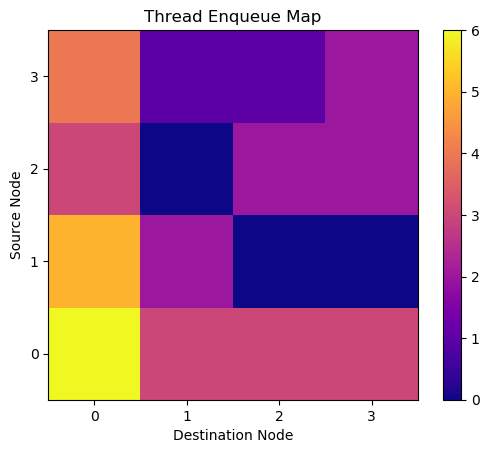

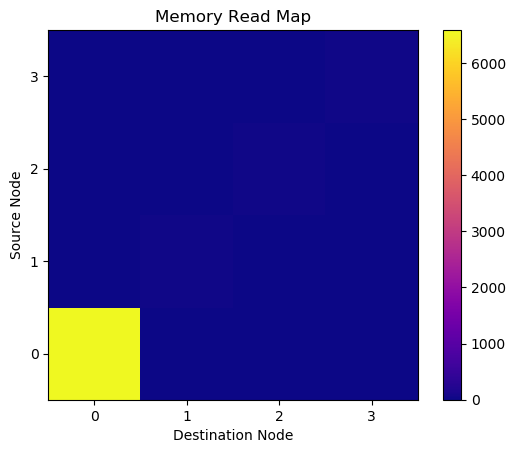

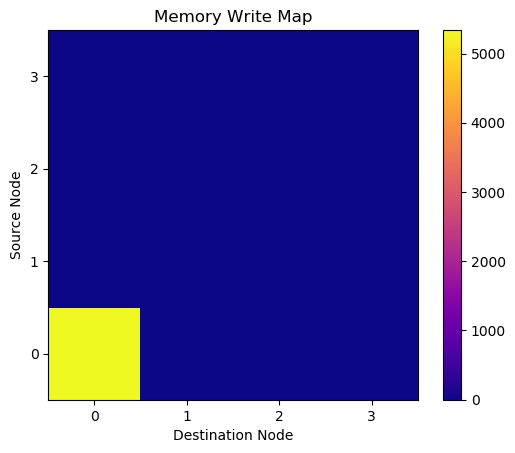

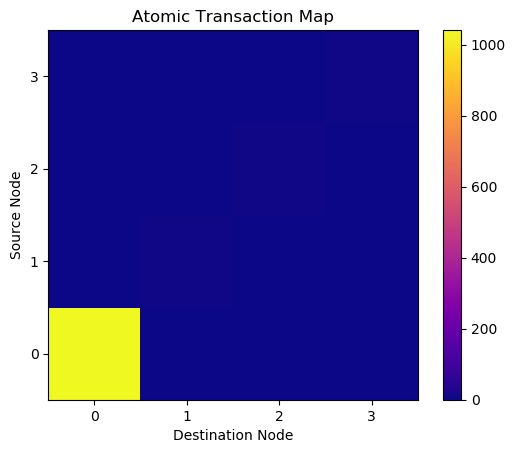

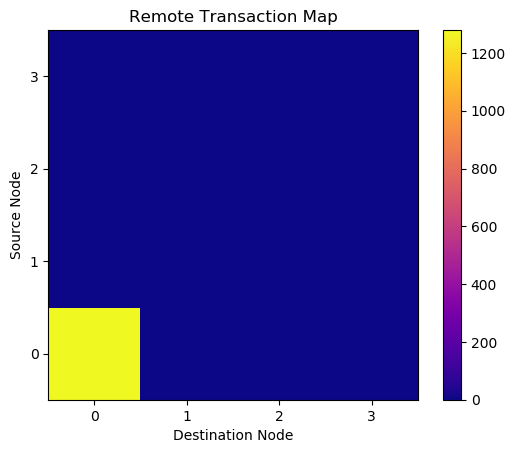

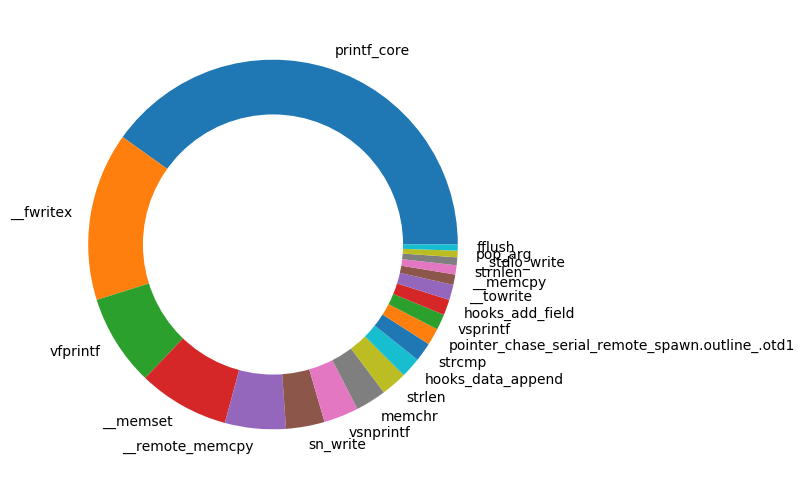

In [9]:
from IPython.display import Image, display

display(Image(filename="pointer_chase_results/pointer_chase.Thread_Enqueue_Map.png"))
display(Image(filename="pointer_chase_results/pointer_chase.Memory_Read_Map.png"))
display(Image(filename="pointer_chase_results/pointer_chase.Memory_Write_Map.png"))
display(Image(filename="pointer_chase_results/pointer_chase.Atomic_Transaction_Map.png"))
display(Image(filename="pointer_chase_results/pointer_chase.Remote_Transaction_Map.png"))
display(Image(filename="pointer_chase_results/pointer_chase_total_instructions.png"))

In [ ]:
%%bash
mkdir -p profile_pointer_chase;
emusim_profile profile_pointer_chase --total_nodes 4 -- ../pointer_chase.mwx -e 4 -t 4 -b 2 -p serial_remote_spawn;

In [ ]:
display(Image(filename="profile_pointer_chase/global_stream.Live_Threads.png"))
#display(Image(filename="profile_hello-world/hello-world.Thread_Activity.png"))
#display(Image(filename="profile_hello-world-spawn-at/hello-world-spawn-at.Thread_Activity.png"))
display(Image(filename="profile_pointer_chase/global_stream.MSP_Activity.png"))
display(Image(filename="profile_pointer_chase/global_stream_total_instructions.png"))

## Global Stream

In [5]:
%%bash
set -x;
mkdir -p global_stream_results;
cd global_stream_results;
date
# emusim.x --capture_timing_queues -m 24 --total_nodes 2 --output_instruction_count -- ../global_stream.mwx -m recursive_remote_spawn -e 6 -t 2;
emusim.x --capture_timing_queues -m 24 --total_nodes 2 --output_instruction_count -- ../global_stream.mwx -m cilk_for -e 6 -t 2;
date
cd ../
set +x;

Thu Apr 20 12:39:20 EDT 2023
Initializing arrays with 192 elements each (0 MiB total, 0 MiB per node)
Doing vector addition using cilk_for
{"spawn_mode":"cilk_for","log2_num_elements":6,"num_threads":2,"num_nodes":2,"num_bytes_per_element":24,"trial":0,"region_name":"cilk_for","core_clk_mhz":175,"use_CORE_CLK_MHZ_envvar":0,"time_ms":0.48,"ticks":84120,"hooks_type":0}
3.195435093 MB/s
Validating results...OK

Info: /OSCI/SystemC: Simulation stopped by user.
Thu Apr 20 12:42:59 EDT 2023


+ mkdir -p global_stream_results
+ cd global_stream_results
+ date
+ emusim.x --capture_timing_queues -m 24 --total_nodes 2 --output_instruction_count -- ../global_stream.mwx -m cilk_for -e 6 -t 2

        SystemC 2.3.3-Accellera --- Mar 20 2023 14:06:30
        Copyright (c) 1996-2018 by all Contributors,
        ALL RIGHTS RESERVED
+ date
+ cd ../
+ set +x


In [6]:
%%bash
set -x;
cd global_stream_results;
make_tqd_plots.py global_stream.tqd;
make_map_plots.py global_stream.mps;
make_uis_plots.py global_stream.uis;
make_hpc_plots.py -f global_stream.hpc;
set +x;

Generating global_stream.MSP_Activity.png
Generating global_stream.SRIO_Outgoing_Activity.png
Generating global_stream.SRIO_Incoming_Activity.png
Generating global_stream.Live_Threads.png
Generating global_stream.Thread_Enqueue_Map.png
Generating global_stream.Memory_Read_Map.png
Generating global_stream.Memory_Write_Map.png
Generating global_stream.Atomic_Transaction_Map.png
Generating global_stream.Remote_Transaction_Map.png
Generating global_stream_total_instructions.png
Generating global_stream_total_migrations.png
Find all graphs in: ./global_stream_20-04-2023_12:46:32
The last hpc call to analyze will be 2
Program called lu_profile_perfcntr with message: HELLO WORLD SPAWN CLEARING COUNTERS
Program called lu_profile_perfcntr with message: HELLO WORLD SPAWN STARTING COUNTERS
Program called lu_profile_perfcntr with message: HELLO WORLD SPAWN STOPPING COUNTERS AT END
Generating Graphs for [HELLO WORLD SPAWN STOPPING COUNTERS AT END]...
Stopping here after read 2
hpc_file_name_base: g

+ cd global_stream_results
+ make_tqd_plots.py global_stream.tqd
+ make_map_plots.py global_stream.mps
+ make_uis_plots.py global_stream.uis
+ make_hpc_plots.py -f global_stream.hpc
/usr/lib64/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/usr/lib64/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
+ set +x


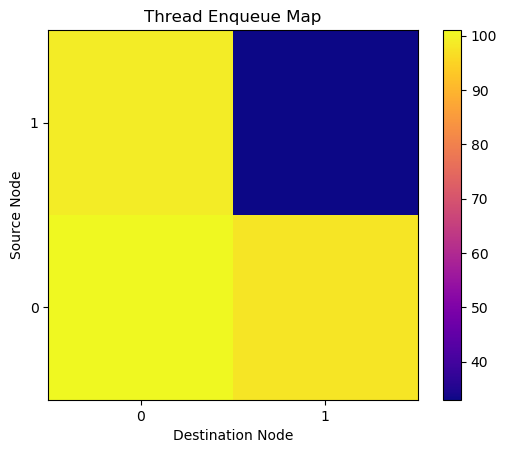

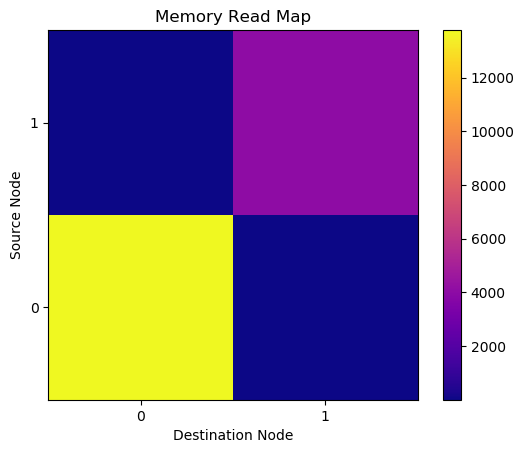

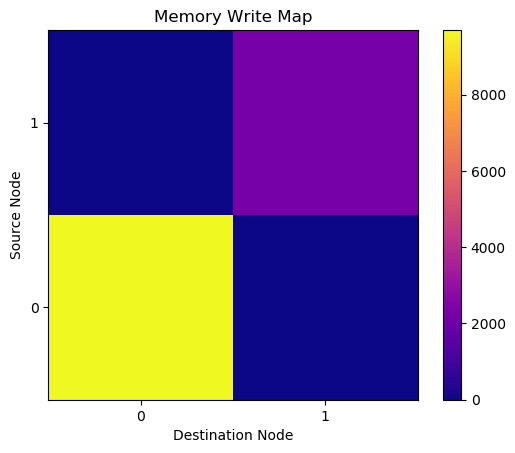

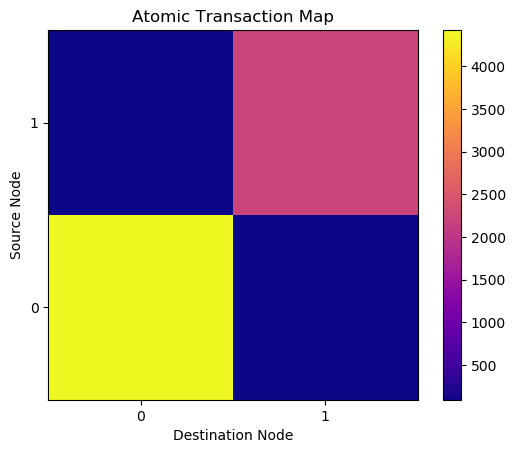

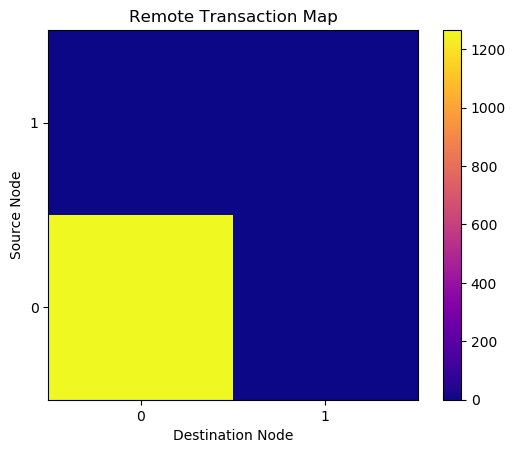

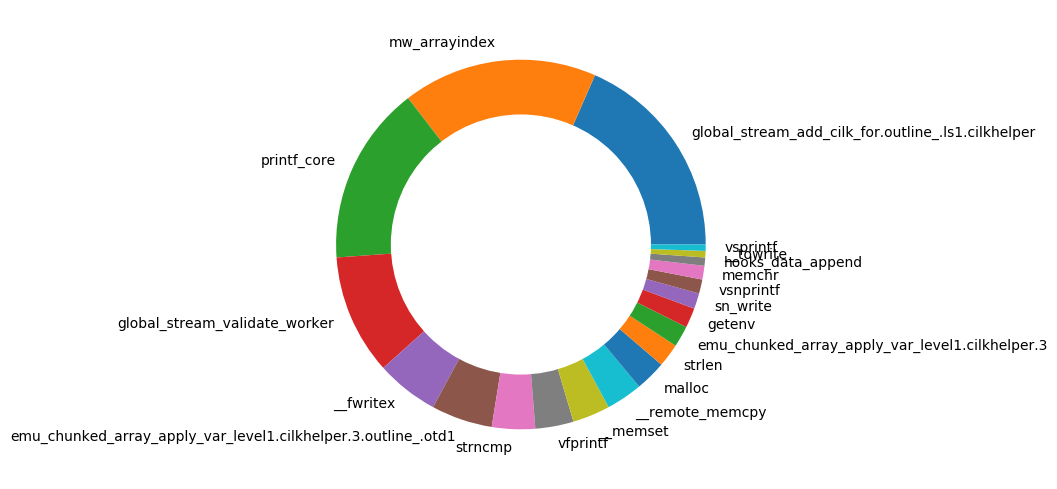

In [7]:
display(Image(filename="global_stream_results/global_stream.Thread_Enqueue_Map.png"))
display(Image(filename="global_stream_results/global_stream.Memory_Read_Map.png"))
display(Image(filename="global_stream_results/global_stream.Memory_Write_Map.png"))
display(Image(filename="global_stream_results/global_stream.Atomic_Transaction_Map.png"))
display(Image(filename="global_stream_results/global_stream.Remote_Transaction_Map.png"))
display(Image(filename="global_stream_results/global_stream_total_instructions.png"))

In [26]:
%%bash
mkdir -p profile_global_stream
emusim_profile profile_global_stream --total_nodes 4 -m 24 -- global_stream.mwx -m cilk_for -e 6 -t 8;
# emusim.x --capture_timing_queues -m 24 --total_nodes 2 --output_instruction_count -- ../global_stream.mwx -m recursive_remote_spawn -e 6 -t 2;
ls profile_global_stream

Generating profile in profile_global_stream/global_stream
emusim.x  --total_nodes 4 -m 24
global_stream.mwx -m cilk_for -e 6 -t 8
Initializing arrays with 192 elements each (0 MiB total, 0 MiB per node)
Doing vector addition using cilk_for
{"spawn_mode":"cilk_for","log2_num_elements":6,"num_threads":8,"num_nodes":4,"num_bytes_per_element":24,"trial":0,"region_name":"cilk_for","core_clk_mhz":175,"use_CORE_CLK_MHZ_envvar":0,"time_ms":0.42,"ticks":73881,"hooks_type":0}
3.638283185 MB/s
Validating results...OK

Info: /OSCI/SystemC: Simulation stopped by user.
Generating profile_global_stream/global_stream_total_instructions.png
Generating profile_global_stream/global_stream_total_migrations.png
Generating profile_global_stream/global_stream.Thread_Enqueue_Map.png
Generating profile_global_stream/global_stream.Memory_Read_Map.png
Generating profile_global_stream/global_stream.Memory_Write_Map.png
Generating profile_global_stream/global_stream.Atomic_Transaction_Map.png
Generating profile_gl


        SystemC 2.3.3-Accellera --- Mar 20 2023 14:06:30
        Copyright (c) 1996-2018 by all Contributors,
        ALL RIGHTS RESERVED
/usr/lib64/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


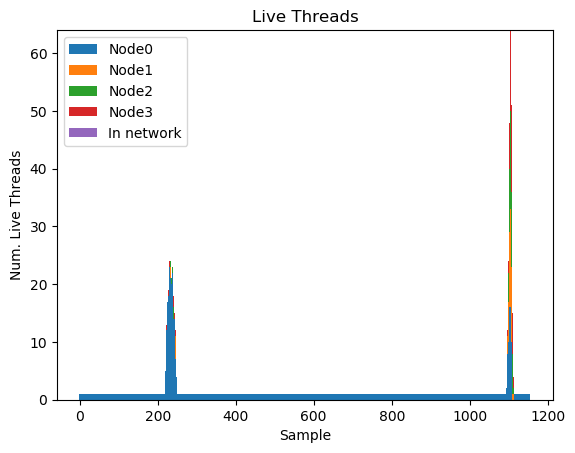

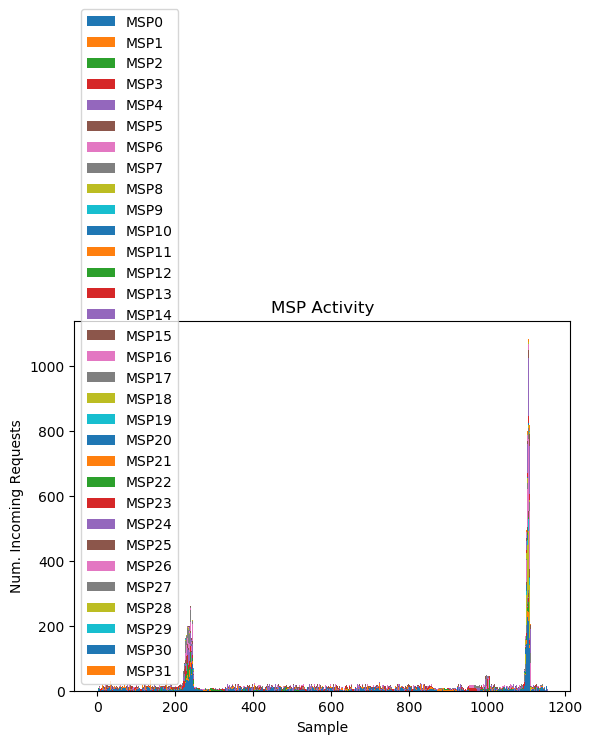

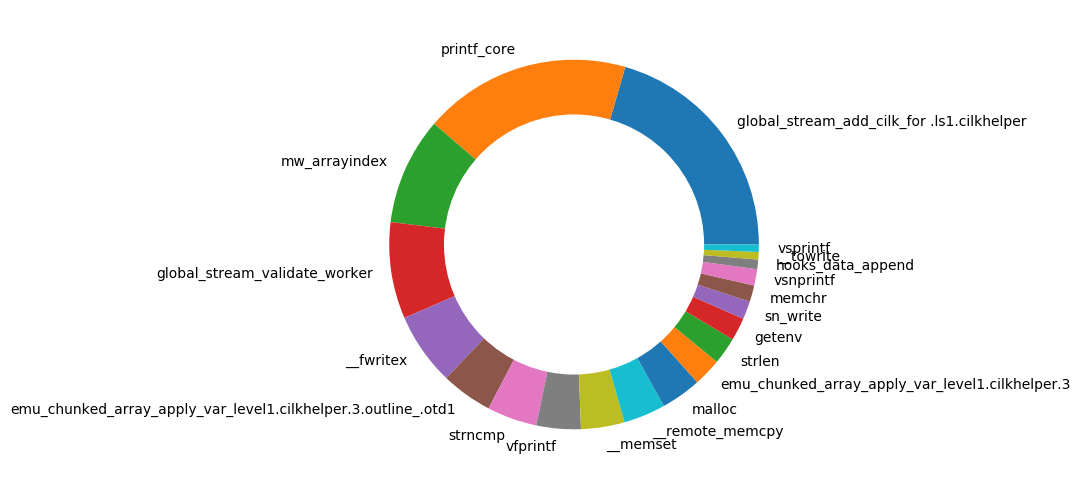

In [27]:
display(Image(filename="profile_global_stream/global_stream.Live_Threads.png"))
#display(Image(filename="profile_hello-world/hello-world.Thread_Activity.png"))
#display(Image(filename="profile_hello-world-spawn-at/hello-world-spawn-at.Thread_Activity.png"))
display(Image(filename="profile_global_stream/global_stream.MSP_Activity.png"))
display(Image(filename="profile_global_stream/global_stream_total_instructions.png"))

## Ping Pong

In [ ]:
%%bash
set -x;
mkdir -p ping_pong_results;
cd ping_pong_results;
emusim.x --capture_timing_queues -m 24 --total_nodes 4 --output_instruction_count -- ../ping_pong.mwx -s -1 -d -1 -m 8 -t 4 -r 2;
# emusim.x -m 24 --total_nodes 2 -- ../hello-world.mwx;
make_tqd_plots.py ping_pong.tqd;
make_map_plots.py ping_pong.mps;
make_uis_plots.py ping_pong.uis;
make_hpc_plots.py -f ping_pong.hpc;
set +x;

In [ ]:
display(Image(filename="ping_pong_results/ping_pong.Thread_Enqueue_Map.png"))
display(Image(filename="ping_pong_results/ping_pong.Memory_Read_Map.png"))
display(Image(filename="ping_pong_results/ping_pong.Memory_Write_Map.png"))
display(Image(filename="ping_pong_results/ping_pong.Atomic_Transaction_Map.png"))
display(Image(filename="ping_pong_results/ping_pong.Remote_Transaction_Map.png"))
display(Image(filename="ping_pong_results/ping_pong_total_instructions.png"))

In [ ]:
%%bash
mkdir -p profile_ping_pong;
emusim_profile profile_ping_pong --total_nodes 2 -m 24 -- ping_pong.mwx -s -1 -d -1 -m 8 -t 4 -r 1
ls profile_ping_pong/ping_pong*

In [ ]:
display(Image(filename="profile_ping_pong/ping_pong.Live_Threads.png"))
display(Image(filename="profile_ping_pong/ping_pong.Live_Threads.png"))
#display(Image(filename="profile_hello-world/hello-world.Thread_Activity.png"))
#display(Image(filename="profile_hello-world-spawn/hello-world-spawn.Thread_Activity.png"))
display(Image(filename="profile_ping_pong/ping_pong.MSP_Activity.png"))
display(Image(filename="profile_ping_pong/ping_pong.MSP_Activity.png"))
display(Image(filename="profile_ping_pong/ping_pong_total_instructions.png"))

## Locks

In [ ]:
%%bash
set -x;
mkdir -p lock_results;
cd lock_results;

emusim.x --capture_timing_queues -m 24 --total_nodes 1 --output_instruction_count -- ../locks.mwx -l 12 -t 2 -r 1

make_tqd_plots.py locks.tqd;
make_map_plots.py locks.mps;
make_uis_plots.py locks.uis;
make_hpc_plots.py -f locks.hpc;
set +x;

In [ ]:
from IPython.display import Image, display

display(Image(filename="lock_results/locks.Live_Threads.png"))
display(Image(filename="lock_results/locks.Atomic_Transaction_Map.png"))
display(Image(filename="lock_results/locks.Memory_Read_Map.png"))
display(Image(filename="lock_results/locks.Memory_Write_Map.png"))
display(Image(filename="lock_results/locks.MSP_Activity.png"))
display(Image(filename="lock_results/locks.Remote_Transaction_Map.png"))
display(Image(filename="lock_results/locks.SRIO_Incoming_Activity.png"))
display(Image(filename="lock_results/locks.SRIO_Outgoing_Activity.png"))
display(Image(filename="lock_results/locks.Thread_Enqueue_Map.png"))
display(Image(filename="lock_results/locks_total_instructions.png"))
display(Image(filename="lock_results/locks_total_migrations.png"))

In [ ]:
%%bash
mkdir -p profile_locks;
emusim_profile profile_locks --total_nodes 2 -m 24 -- ./locks.mwx -l 12 -t 2 -r 1

In [ ]:
display(Image(filename="profile_locks/locks.Live_Threads.png"))
display(Image(filename="profile_locks/locks.Live_Threads.png"))
display(Image(filename="profile_locks/locks.MSP_Activity.png"))
display(Image(filename="profile_locks/locks.MSP_Activity.png"))
display(Image(filename="profile_locks/locks_total_instructions.png"))

## Locks

Once we've finished our testing, we can then clean up some of the logfiles that we used for this example.

In [12]:
!make clean

rm -f *.mwx *.tqd *.cdc *.vsf *.mps *.uis *.csv *.hpc; \
./helpers/backup_imgs.sh
